In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, backend as K, Model
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [2]:
with open('chess_X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('chess_X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('chess_y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('chess_y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

In [3]:
unique_classes_train = np.unique(y_train)
unique_classes_test = np.unique(y_test)
y_combined_unique = np.concatenate((unique_classes_train, unique_classes_test))

num_classes = len(np.unique(y_combined_unique))
seq_len = 28

print(X_train.shape)
print(y_train.shape)

input_shape = (seq_len, 8, 8, X_train.shape[4])


(7470, 28, 8, 8, 12)
(7470,)


Evaluating Gradient Boosting...
Accuracy: 0.8990
F1 Score: 0.8978
Precision: 0.9016
Recall: 0.8990


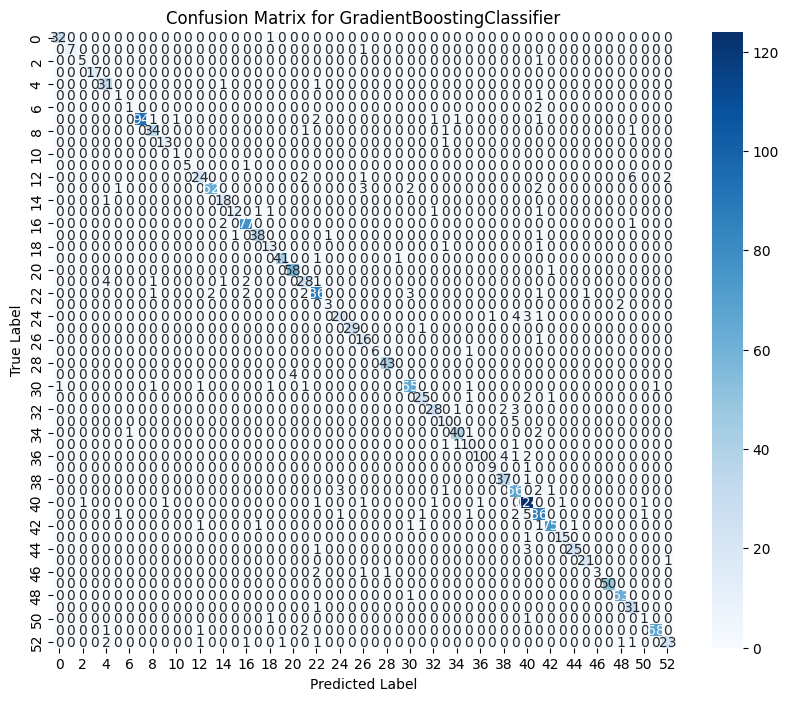

Evaluating Neural Network...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8340
F1 Score: 0.8289
Precision: 0.8353
Recall: 0.8340


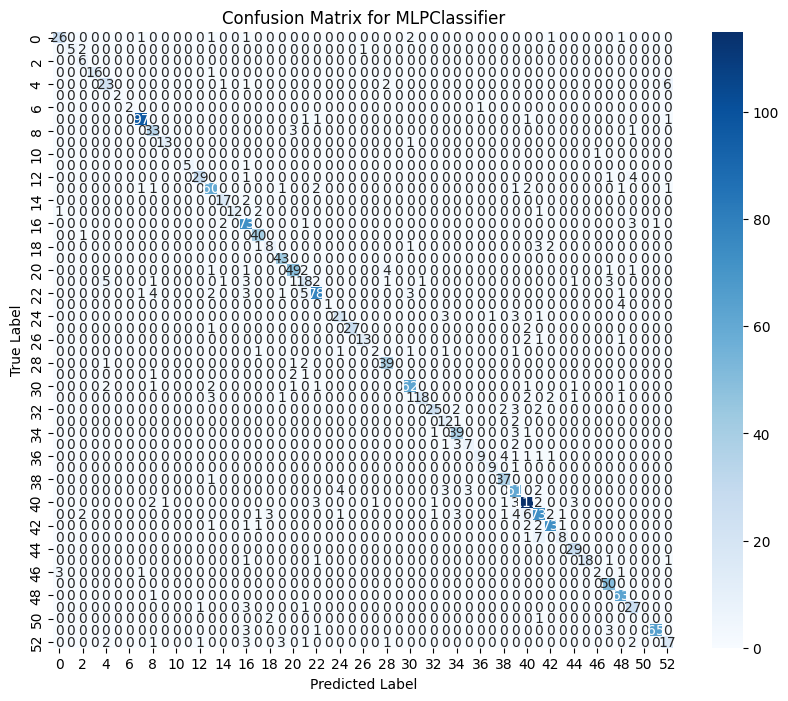

Evaluating Logistic Regression...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8710
F1 Score: 0.8679
Precision: 0.8732
Recall: 0.8710


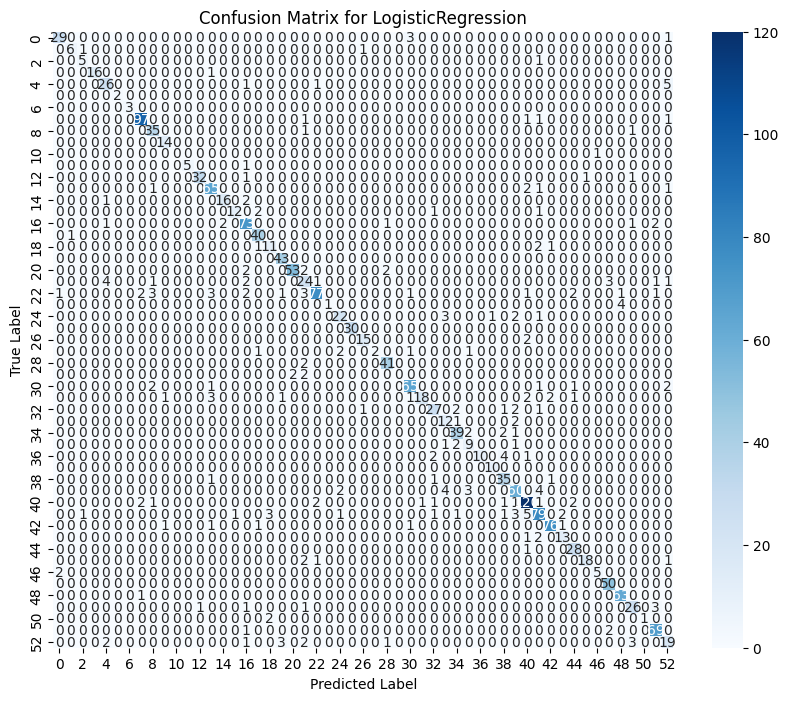

X_train shape: (7470, 28, 8, 8, 12)
y_train shape: (7470,)
Number of unique classes: 53
Input shape: (28, 8, 8, 12)


In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reshape data for the models that require flat inputs
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

# List of models to evaluate
models = [
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ("Neural Network", MLPClassifier(hidden_layer_sizes=(100,), random_state=42, max_iter=300)),
    ("Logistic Regression", LogisticRegression(max_iter=200, random_state=42, multi_class='ovr'))
]

# Evaluate each model
for model_name, model in models:
    print(f"Evaluating {model_name}...")
    evaluate_model(model, X_train_flat, y_train, X_test_flat, y_test)

# Print the shapes of the data and the unique classes in the datasets
unique_classes_train = np.unique(y_train)
unique_classes_test = np.unique(y_test)
y_combined_unique = np.concatenate((unique_classes_train, unique_classes_test))

num_classes = len(np.unique(y_combined_unique))
seq_len = 28

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Number of unique classes:", num_classes)
print("Input shape:", (seq_len, 8, 8, X_train.shape[4]))


Evaluating LSTM Model...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.1887 - loss: 3.0929
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5846 - loss: 1.4351
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7087 - loss: 0.9895
Epoch 4/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8039 - loss: 0.6721
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8514 - loss: 0.4986
Epoch 6/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8728 - loss: 0.4349
Epoch 7/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9049 - loss: 0.3268
Epoch 8/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9231 - loss: 0.2704
Epoch 9/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9243 - loss: 0.2509
Epoch 10/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9482 - loss: 0.1786
Epoch 11/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9528 - loss: 0.1530
Epoch 12/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 

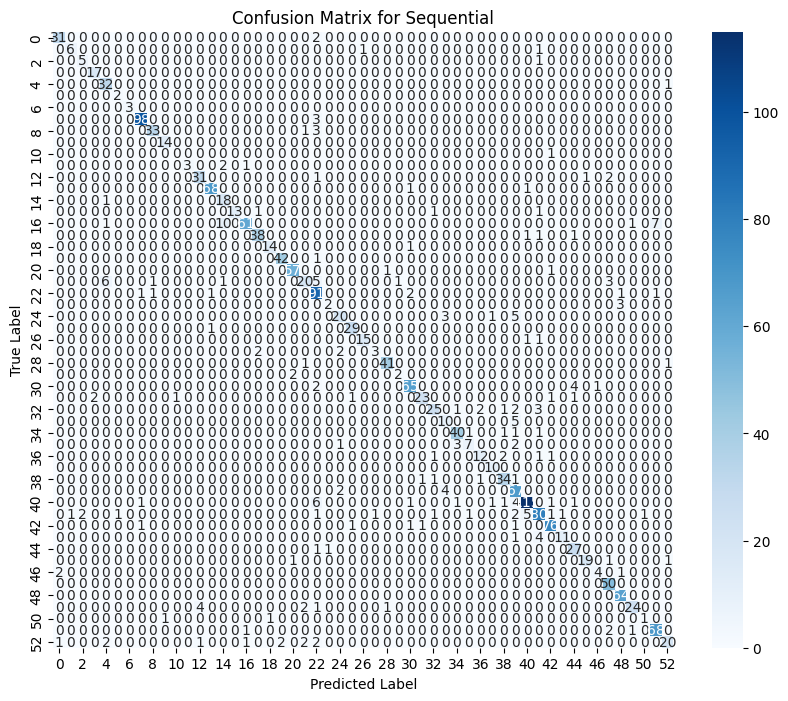

Evaluating CNN Model...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 53), output.shape=(None, 28, 53)

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv3D, Flatten, MaxPooling3D, TimeDistributed
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Encode labels if they are not already encoded
label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

# Reshape data for LSTM
X_train_lstm = X_train.reshape(X_train.shape[0], seq_len, -1)  # Flattening spatial dimensions and channels
X_test_lstm = X_test.reshape(X_test.shape[0], seq_len, -1)

# LSTM Model
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(100, input_shape=input_shape))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# CNN Model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(TimeDistributed(Conv2D(32, kernel_size=(3, 3), activation='relu'), input_shape=input_shape))
    model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(100))  # Optional: Using LSTM after CNN layers to capture temporal dependencies
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Evaluation function for Keras models
def evaluate_keras_model(model, X_train, y_train, X_test, y_test, batch_size=32, epochs=15):
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()

# Define input shape
num_classes = y_train_encoded.shape[1]

# Evaluate the LSTM model
print("Evaluating LSTM Model...")
lstm_model = create_lstm_model((seq_len, X_train_lstm.shape[2]), num_classes)
evaluate_keras_model(lstm_model, X_train_lstm, y_train_encoded, X_test_lstm, y_test_encoded)

# Evaluate the CNN model
print("Evaluating CNN Model...")
cnn_model = create_cnn_model((seq_len, 8, 8, 12), num_classes)
evaluate_keras_model(cnn_model, X_train, y_train_encoded, X_test, y_test_encoded)
